In [1]:
!pip install fuzzy_c_means

     |████████████████████████████████| 10.9 MB 4.8 MB/s 


In [2]:
!pip install hmmlearn

     |████████████████████████████████| 129 kB 6.1 MB/s 


In [3]:
!pip install mrmr_selection

     |████████████████████████████████| 80 kB 4.1 MB/s 


In [4]:
!pip install sklearn_relief

In [5]:
!pip install ReliefF

     |████████████████████████████████| 48 kB 2.6 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=29e72221a7bcff03439688abb68de9dce6246eca6dc68da7a83f4b0aef4af062
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


Libraries

In [6]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for SVC
from sklearn.svm import SVC
#Sklearn for MLP
from sklearn.neural_network import MLPClassifier
from fcmeans import FCM
from sklearn.cluster import KMeans
from hmmlearn import hmm
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score,multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
warnings.filterwarnings('ignore') 
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
# Columns for normalization
from sklearn.preprocessing import Normalizer
from mrmr import mrmr_classif
from sklearn.datasets import make_classification
import sklearn_relief as sr
from sklearn.pipeline import Pipeline

In [7]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/My Drive/Colab Notebooks/Machine Learning/Final/

/content/drive/My Drive/Colab Notebooks/Machine Learning/Final


In [9]:
!ls

QCM10_Padalkar_Rashmi.csv  QCM3_Padalkar_Rashmi.csv  QCM7_Padalkar_Rashmi.csv
QCM12_Padalkar_Rashmi.csv  QCM6_Padalkar_Rashmi.csv


Reading the Files

In [10]:
#Load all the data files
Data3 = pd.read_csv("QCM3_Padalkar_Rashmi.csv") 
Data6 = pd.read_csv("QCM6_Padalkar_Rashmi.csv") 
Data7 = pd.read_csv("QCM7_Padalkar_Rashmi.csv")
Data10 = pd.read_csv("QCM10_Padalkar_Rashmi.csv")
Data12 = pd.read_csv("QCM12_Padalkar_Rashmi.csv")

####Defining 

Defination for SVM and MLP

In [11]:
def Evaluate_Model(Classifier, Classifier_Name,X_train, X_test,y_train,y_test):

  SensitivityClass1 = []
  SensitivityClass2 = []
  SensitivityClass3 = []
  SensitivityClass4 = []
  SensitivityClass5 = []

  SpecificityClass1 = []
  SpecificityClass2 = []
  SpecificityClass3 = []
  SpecificityClass4 = []
  SpecificityClass5 = []

  
  y_score = Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)


  print("Accurancy for",Classifier_Name, ": ", accuracy_score(y_test,y_pred))
  print("\n")

  cm = confusion_matrix(y_test,y_pred)

  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
  print('Sensitivity for class 1: ', sensitivity)
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
  print('Sensitivity for class 2: ', sensitivity)
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
  print('Sensitivity for class 3: ', sensitivity )
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
  print('Sensitivity for class 4: ', sensitivity )
  SensitivityClass4.append(sensitivity)

  sensitivity = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
  print('Sensitivity for class 5: ', sensitivity)
  SensitivityClass5.append(sensitivity)
  print('\n')
  
  specificity = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])
  print('specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity =(cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])
  print('specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[4,2]+cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])
  print('specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[4,3]+cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])
  print('specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('specificity for class 5: ', specificity)
  SpecificityClass5.append(specificity)

  print('\n')
  Result = classification_report(y_test, y_pred)
  print("Confusion Matrix:\n")
  print(cm)
  print("\n")
  print("Classification Report:\n")
  print(Result)

Defination for KMeans

In [12]:
def MaxAcc(y_pred,y):
    c = 0
    for i in range(len(y_pred)):
        if(y_pred[i]==y[i]):
            c +=1
    return c / len(y_pred)

In [13]:
def MaxAccCluster(x_train, y):
  for i in range(1,11):
      kmeans = KMeans(n_clusters = i, init ='random',n_init = 10, max_iter = 200)
      pred = kmeans.fit_predict(x_train)
      Accuracy = MaxAcc(pred,y)
      print("For ",i ,"Acc ", Accuracy)

In [14]:
def Clustering_Evaluate_Model(Clustering,Classifier_Name ,x,y):
  SensitivityClass1 = []
  SensitivityClass2 = []
  SensitivityClass3 = []
  SensitivityClass4 = []
  SensitivityClass5 = []

  SpecificityClass1 = []
  SpecificityClass2 = []
  SpecificityClass3 = []
  SpecificityClass4 = []
  SpecificityClass5 = []
  
  y = y.to_numpy()
  y_score = Clustering.fit(x)
  y_pred= Clustering.predict(x)

  data = pd.DataFrame(y_pred, columns = ['Class'])
  y_pred = data.replace({y_pred[0]: y[0], y_pred[5]: y[5], y_pred[10]: y[10], y_pred[15]: y[15],y_pred[20]: y[20]}).to_numpy()


  print("Accurancy for",Classifier_Name, ": ", accuracy_score(y,y_pred))
  print("\n")

  cm = confusion_matrix(y,y_pred)

  sensitivity =cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
  print('Sensitivity for class 2: ', sensitivity)
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
  print('Sensitivity for class 3: ', sensitivity)
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
  print('Sensitivity for class 4: ', sensitivity)
  SensitivityClass4.append(sensitivity)

  sensitivity = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
  print('Sensitivity for class 5: ', sensitivity)
  SensitivityClass5.append(sensitivity)
  print("\n\n")


  specificity = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity =(cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[4,2]+cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[4,3]+cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 5: ', specificity)
  SpecificityClass4.append(specificity)
  print("\n")

 
  print("Confusion Matrix")
  print(cm)
  print("\n")

  Result = classification_report(y, y_pred)
  print("Classification Report:\n")
  print(Result)


Defination for F-CMeans

In [15]:
def ClusteringFCMeans_Evaluate_Model(FCMeansClustering,Classifier_Name,x, y):  
  SensitivityClass1 = []
  SensitivityClass2 = []
  SensitivityClass3 = []
  SensitivityClass4 = []
  SensitivityClass5 = []

  SpecificityClass1 = []
  SpecificityClass2 = []
  SpecificityClass3 = []
  SpecificityClass4 = []
  SpecificityClass5 = []

  FCMeansClustering.fit(x.values)
  y_pred= FCMeansClustering.predict(x.values)
  data = pd.DataFrame(y_pred, columns=['Class'])
  y = y.to_numpy()
  y_pred = data.replace({y_pred[0]: y[0], y_pred[5]: y[5], y_pred[10]: y[10], y_pred[15]: y[15],y_pred[20]: y[20]}).to_numpy()

  print("Accurancy for",Classifier_Name, ": ", accuracy_score(y,y_pred))
  print("\n")
  cm = confusion_matrix(y,y_pred)


  sensitivity =cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
  print('Sensitivity for class 1: ', sensitivity )
  SensitivityClass1.append(sensitivity)

  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
  print('Sensitivity for class 2: ', sensitivity)
  SensitivityClass2.append(sensitivity)

  sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
  print('Sensitivity for class 3: ', sensitivity)
  SensitivityClass3.append(sensitivity)

  sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
  print('Sensitivity for class 4: ', sensitivity)
  SensitivityClass4.append(sensitivity)

  sensitivity = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
  print('Sensitivity for class 5: ', sensitivity)
  SensitivityClass5.append(sensitivity)
  print("\n\n")


  specificity = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])
  print('Specificity for class 1: ', specificity)
  SpecificityClass1.append(specificity)

  specificity =(cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])
  print('Specificity for class 2: ', specificity)
  SpecificityClass2.append(specificity) 

  specificity =(cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[4,2]+cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])
  print('Specificity for class 3: ', specificity)
  SpecificityClass3.append(specificity) 

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[4,3]+cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])
  print('Specificity for class 4: ', specificity)
  SpecificityClass4.append(specificity)

  specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])
  print('Specificity for class 5: ', specificity)
  SpecificityClass5.append(specificity)
  print("\n\n")

  Result = classification_report(y, y_pred)

  print("Confusion Matrix")
  print(cm)
  print("\n") 
  print("Classification Report:\n")
  print(Result)



Defination for HMM

In [16]:
# Defining function to get the data of particular class

def getClassData(cls, dataframe, y):
  # Getting the indexes for specific class
  indexes = np.where(y == cls)
  return dataframe[indexes], y[indexes]

In [17]:
# Getting the predicted values

def getPredictions(predictions):
  output_classes = list()

  # Looping for features
  # Calculating probailities

  probabilities = list()
  for x in range(len(predictions[0])):
    all_proba = list()
    # Adding all probabilities for each classes
    all_proba.append(predictions[0][x])
    all_proba.append(predictions[1][x])
    all_proba.append(predictions[2][x])
    all_proba.append(predictions[3][x])
    all_proba.append(predictions[4][x])
    max_value = max(all_proba)
    max_index = all_proba.index(max_value)
    output_classes.append(max_index)
  return output_classes

In [18]:
# Get probabilities for the class
def getProbabilities(prob, classIndex):

  # Index for the hmm model state to be used for prediction
  info = {
      0: 0,
      1: 1,
      2: 0,
      3: 1,
      4: 0
  }
  
  actual_prob = list()
  for x in prob:
    actual_prob.append(x[info[classIndex]])
  return actual_prob

In [19]:
def Evaluate_Model_HMM(clf,clf_Name ,x_train, x_test,y_train,y_test):

  SensitivityClass1 = []
  SensitivityClass2 = []
  SensitivityClass3 = []
  SensitivityClass4 = []
  SensitivityClass5 = []

  SpecificityClass1 = []
  SpecificityClass2 = []
  SpecificityClass3 = []
  SpecificityClass4 = []
  SpecificityClass5 = []
  auc_scores = list()
  actual_classes = list()
  predicted_classes = list()
  probabilities = list()

  # Handling classifiers for each classes
  for classIndex in range(5):
    print("ClassIndex", classIndex)
    classValues_train, y_values = getClassData(classIndex, x_train, y_train)
    clf.fit(classValues_train)
    # Getting the probabilities
    proba = clf.predict_proba(x_test)
    y_pred= clf.predict(x_test)    

    # Getting the actual probabililies for prediction
    probs = getProbabilities(proba, classIndex)
    probabilities.append(probs)
    
  final_predictions = getPredictions(probabilities)
  final_predictions = np.array(final_predictions)
  cm1 = multilabel_confusion_matrix(y_test, final_predictions)

  auc_scores.append(accuracy_score(y_test, final_predictions))
  #print(f"Accuracy for fold {fold} - ", accuracy_score(y_test, final_predictions) * 100, "%")
  print("Accuracy for ",clf_Name,": ",accuracy_score(y_test, final_predictions))

  #print("\n")
  #cm = confusion_matrix(y,y_pred)


  #sensitivity =cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3]+cm[0,4])
  #print('Sensitivity for class 1: ', sensitivity )
  #SensitivityClass1.append(sensitivity)

  #sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3]+cm[1,4])
  #print('Sensitivity for class 2: ', sensitivity)
  #SensitivityClass2.append(sensitivity)

  #sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3]+cm[2,4])
  #print('Sensitivity for class 3: ', sensitivity)
  #SensitivityClass3.append(sensitivity)

  #sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3]+cm[3,4])
  #print('Sensitivity for class 4: ', sensitivity)
  #SensitivityClass4.append(sensitivity)

  #sensitivity = cm[4,4]/(cm[4,0]+cm[4,1]+cm[4,2]+cm[4,3]+cm[4,4])
  #print('Sensitivity for class 5: ', sensitivity)
  #SensitivityClass5.append(sensitivity)
  #print("\n\n")


  #specificity = (cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[4,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])
  #print('Specificity for class 1: ', specificity)
  ##SpecificityClass1.append(specificity)

  #specificity =(cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[4,1]+cm[0,0]+cm[2,2]+cm[3,3]+cm[4,4])
  #print('Specificity for class 2: ', specificity)
  #SpecificityClass2.append(specificity) 

  #specificity =(cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[4,2]+cm[0,0]+cm[1,1]+cm[3,3]+cm[4,4])
  #print('Specificity for class 3: ', specificity)
  #SpecificityClass3.append(specificity) 

  #specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[4,3]+cm[0,0]+cm[1,1]+cm[2,2]+cm[4,4])
  #print('Specificity for class 4: ', specificity)
  #SpecificityClass4.append(specificity)

  #specificity = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(cm[0,4]+cm[1,4]+cm[2,4]+cm[3,4]+cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])
  #print('Specificity for class 5: ', specificity)
  #SpecificityClass5.append(specificity)
  #print("\n\n")
  #print("Confusion Matrix")
  #print(cm)
  #print(cm1)




Defination for Feature Selection - SVM,MLP

In [20]:
def Evaluate_Model_FeatureSelection(Classifier,X_train, X_test,y_train,y_test):
  y_score = Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)
  Acc = accuracy_score(y_test,y_pred)
  print("Accuracy", Acc)

Defination for Feature Selection - Kmeans

In [21]:
def Clustering_Evaluate_Model_FeatureSelection(Clustering,x,y):
  
  y = y.to_numpy()
  y_score = Clustering.fit(x)
  y_pred= Clustering.predict(x)

  data = pd.DataFrame(y_pred, columns = ['Class'])
  y_pred = data.replace({y_pred[0]: y[0], y_pred[5]: y[5], y_pred[10]: y[10], y_pred[15]: y[15],y_pred[20]: y[20]}).to_numpy()
  print("Accuracy for", accuracy_score(y,y_pred))
  #print("\n")

Defination for Feature Selection - CMeans

In [22]:
def ClusteringFCMeans_Evaluate_Model_FeatureSelection(FCMeansClustering,x, y):  
  FCMeansClustering.fit(x.values)
  y_pred= FCMeansClustering.predict(x.values)
  data = pd.DataFrame(y_pred, columns=['Class'])
  y = y.to_numpy()
  y_pred = data.replace({y_pred[0]: y[0], y_pred[5]: y[5], y_pred[10]: y[10], y_pred[15]: y[15],y_pred[20]: y[20]}).to_numpy()

  print("Accuracy",accuracy_score(y,y_pred))

###Defining the Classifier

In [23]:
Classifier_SVC = SVC(probability = True)
Classifier_MLP = MLPClassifier(hidden_layer_sizes=(50,100,150),max_iter=200)
Classifier_KMeans = KMeans(n_clusters = 5)
Classifier_FCM = FCM(n_clusters = 5)
clf_HMM = hmm.GaussianHMM(n_components = 2, algorithm="viterbi", covariance_type = "diag", n_iter = 25)

###QCM3

In [24]:
#Priting the dataset
Data3.head(5)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0


In [25]:
#Checking how many rows and Columns
Data3.shape

(25, 11)

In [26]:
#Info
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB


In [27]:
#Checking the Null Values
Data3.isnull().sum()

0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
Class            0
dtype: int64

In [28]:
#Statistical Information
Data3.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-62.964800,-61.748400,-95.184400,-94.980000,-131.463200,-130.02800,-166.317600,-162.695600,-202.340000,-197.440400,2.000000
std,27.400565,24.584129,40.087804,35.439244,53.683134,47.50013,64.778318,58.192087,75.130934,68.696899,1.443376
min,-93.290000,-81.880000,-133.960000,-127.760000,-183.330000,-179.25000,-224.730000,-221.490000,-274.270000,-271.730000,0.000000
25%,-78.290000,-76.820000,-125.780000,-113.270000,-174.740000,-161.48000,-215.400000,-215.090000,-264.810000,-263.280000,1.000000
50%,-67.290000,-72.720000,-103.320000,-104.770000,-152.730000,-140.56000,-200.890000,-165.880000,-232.820000,-194.700000,2.000000
75%,-65.950000,-64.530000,-93.750000,-102.500000,-114.960000,-124.23000,-139.180000,-147.220000,-170.520000,-178.700000,3.000000
max,-9.690000,-10.620000,-14.430000,-18.310000,-24.640000,-30.56000,-38.620000,-45.590000,-54.890000,-62.280000,4.000000


In [29]:
#Get count of number Class
Data3['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [30]:
#Creating the variable x and y
x3 = Data3.drop('Class', axis = 1)
y3 = Data3['Class']

In [31]:
#split the data into train and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(20, 10)
(20,)
(5, 10)
(5,)


1. SVM

In [32]:
#Getting Results For the SVM
print("Results of SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_train3 ,X_test3,y_train3,y_test3)

Results of SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [33]:
#Getting For the MLP
print("Results of MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_train3 ,X_test3,y_train3,y_test3)

Results of MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [34]:
#Getting For the KMeans
print("Results of KMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",x3,y3)

Results of KMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCMeans

In [35]:
#Getting For the FCMeans
print("Results of FCMeans:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",x3,y3)

Results of FCMeans:

Accurancy for FCM :  0.68


Sensitivity for class 1:  0.4
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  0.6



Confusion Matrix
[[2 0 0 0 3]
 [0 5 0 0 0]
 [0 0 0 0 5]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         5
           3       1.00      1.00      1.00         5
           4       0.38      1.00      0.56         5

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.63        25
weighted avg       0.68      0.68      0.63        25



###QCM6

In [36]:
#printing the data
Data6.head(5)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-11.82,-13.29,-19.32,-26.28,-38.14,-50.09,-59.78,-75.04,-85.63,-104.66,0
1,-11.54,-14.18,-25.35,-32.75,-48.77,-60.08,-75.41,-89.72,-104.25,-121.90,0
2,-12.45,-15.81,-33.33,-40.64,-61.50,-72.12,-91.75,-104.67,-124.21,-139.76,0
3,-14.67,-18.49,-40.56,-47.67,-72.11,-82.19,-106.26,-118.26,-141.95,-155.84,0
4,-18.07,-19.74,-47.08,-53.50,-81.15,-89.81,-117.91,-128.10,-156.66,-168.72,0


In [37]:
#Checking the rows and columns
Data6.shape

(25, 11)

In [38]:
#Info
Data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB


In [39]:
#Checking the null values
Data6.isnull().sum()

0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
Class            0
dtype: int64

In [40]:
#Statistical Information
Data6.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-70.022800,-66.297600,-118.228800,-108.374000,-174.944800,-158.307200,-234.227200,-211.156800,-304.817200,-274.861200,2.000000
std,30.809332,31.165826,47.705395,40.709508,69.946749,54.491029,93.899728,71.054843,125.666729,95.183215,1.443376
min,-98.990000,-102.020000,-174.990000,-158.710000,-261.380000,-224.800000,-341.090000,-289.880000,-447.740000,-381.940000,0.000000
25%,-94.480000,-96.500000,-146.010000,-132.200000,-223.790000,-189.510000,-318.910000,-269.470000,-417.080000,-353.500000,1.000000
50%,-76.090000,-63.930000,-136.840000,-119.610000,-193.500000,-182.300000,-266.770000,-248.060000,-359.320000,-327.040000,2.000000
75%,-68.130000,-55.550000,-109.490000,-93.980000,-137.890000,-125.450000,-163.890000,-154.370000,-192.030000,-186.270000,3.000000
max,-11.540000,-13.290000,-19.320000,-26.280000,-38.140000,-50.090000,-59.780000,-75.040000,-85.630000,-104.660000,4.000000


In [41]:
#Get count of number of Class
Data6['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [42]:
#Creating the variable x and y
x6 = Data6.drop('Class', axis=1)
y6 = Data6['Class']

In [43]:
#split the data into train and test set
X_train6, X_test6, y_train6, y_test6 = train_test_split(x6, y6,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train6.shape)
print(y_train6.shape)
print(X_test6.shape)
print(y_test6.shape)

(20, 10)
(20,)
(5, 10)
(5,)


1. SVM

In [44]:
#Getting the Results
print("Results for SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_train6,X_test6,y_train6,y_test6)

Results for SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [118]:
#Getting the Results
print("Results for MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_train6 ,X_test6,y_train6,y_test6)

Results for MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [46]:
#Getting the Results
print("Results for KMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",x6,y6)

Results for KMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCMeans

In [47]:
#Getting the Results
print("Results for FCM:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",x6,y6)

Results for FCM:

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###QCM7

In [48]:
#Printing the data
Data7.head(5)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-11.23,-14.21,-18.71,-22.65,-27.32,-32.39,-35.28,-40.72,-40.63,-49.87,0
1,-12.44,-15.44,-21.13,-25.53,-30.45,-36.22,-36.85,-45.11,-45.40,-55.16,0
2,-13.75,-16.72,-24.00,-28.29,-33.91,-39.95,-40.96,-49.43,-49.91,-60.11,0
3,-15.05,-17.98,-26.42,-30.65,-36.56,-43.00,-43.81,-52.73,-53.89,-64.35,0
4,-16.67,-19.11,-28.69,-32.58,-39.62,-45.68,-47.16,-55.65,-57.20,-67.68,0


In [49]:
#Checking the rows and columns
Data7.shape

(25, 11)

In [50]:
#Info
Data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB


In [51]:
#Checking the Null Values
Data7.isnull().sum()

0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
Class            0
dtype: int64

In [52]:
#Statistical Inofrmation
Data7.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-27.575600,-39.078800,-39.226400,-50.900800,-50.565600,-62.217200,-62.072000,-73.214400,-74.901600,-85.690400,2.000000
std,7.841416,13.273283,8.818888,13.396202,11.271412,15.010236,15.432341,18.100784,20.416242,22.185166,1.443376
min,-35.990000,-55.460000,-47.830000,-62.890000,-62.170000,-77.140000,-80.850000,-94.500000,-101.480000,-115.360000,0.000000
25%,-33.240000,-47.890000,-45.300000,-62.030000,-60.910000,-74.610000,-76.940000,-89.640000,-93.950000,-104.970000,1.000000
50%,-29.590000,-42.610000,-43.820000,-57.190000,-54.890000,-71.230000,-64.630000,-79.050000,-74.920000,-88.070000,2.000000
75%,-25.490000,-34.160000,-36.480000,-45.230000,-41.490000,-49.570000,-48.570000,-55.730000,-56.000000,-64.350000,3.000000
max,-11.230000,-14.210000,-18.710000,-22.650000,-27.320000,-32.390000,-35.280000,-40.720000,-40.630000,-49.870000,4.000000


In [53]:
#Get count of number of Class
Data7['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [54]:
#Creating the variable x and y
x7 = Data7.drop('Class', axis=1)
y7 = Data7['Class']

In [55]:
#split the data into train and test set
X_train7, X_test7, y_train7, y_test7 = train_test_split(x7, y7,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train7.shape)
print(y_train7.shape)
print(X_test7.shape)
print(y_test7.shape)

(20, 10)
(20,)
(5, 10)
(5,)


1. SVM

In [56]:
#Getting the Results
print("Results for SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_train7,X_test7,y_train7,y_test7)

Results for SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [57]:
#Getting the Results
print("Results for MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_train7 ,X_test7,y_train7,y_test7)

Results for MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [98]:
#Getting the Results
print("Results for KMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",x7,y7)

Results for KMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCM

In [59]:
#Getting the Results
print("Results for FCM:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",x7,y7)

Results for FCM:

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###QCM 10

In [60]:
#Printing the Data
Data10.head(5)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-11.98,-10.99,-19.12,-17.28,-33.13,-28.45,-48.83,-40.77,-62.49,-50.82,0
1,-12.15,-11.33,-22.33,-19.95,-39.82,-33.64,-56.90,-46.77,-73.32,-58.96,0
2,-12.58,-11.74,-26.67,-23.34,-46.48,-38.69,-65.95,-53.46,-84.53,-67.21,0
3,-13.79,-12.82,-30.56,-26.18,-52.30,-42.98,-73.81,-59.19,-94.41,-74.40,0
4,-15.73,-13.87,-34.54,-28.65,-57.44,-46.26,-80.37,-63.49,-102.94,-80.25,0


In [61]:
#Checking the rows and columns
Data10.shape

(25, 11)

In [62]:
#Info
Data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB


In [63]:
#Checking the Null Values
Data10.isnull().sum()

0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
Class            0
dtype: int64

In [64]:
#Statistical Information
Data10.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-27.575600,-39.078800,-39.226400,-50.900800,-50.565600,-62.217200,-62.072000,-73.214400,-74.901600,-85.690400,2.000000
std,7.841416,13.273283,8.818888,13.396202,11.271412,15.010236,15.432341,18.100784,20.416242,22.185166,1.443376
min,-35.990000,-55.460000,-47.830000,-62.890000,-62.170000,-77.140000,-80.850000,-94.500000,-101.480000,-115.360000,0.000000
25%,-33.240000,-47.890000,-45.300000,-62.030000,-60.910000,-74.610000,-76.940000,-89.640000,-93.950000,-104.970000,1.000000
50%,-29.590000,-42.610000,-43.820000,-57.190000,-54.890000,-71.230000,-64.630000,-79.050000,-74.920000,-88.070000,2.000000
75%,-25.490000,-34.160000,-36.480000,-45.230000,-41.490000,-49.570000,-48.570000,-55.730000,-56.000000,-64.350000,3.000000
max,-11.230000,-14.210000,-18.710000,-22.650000,-27.320000,-32.390000,-35.280000,-40.720000,-40.630000,-49.870000,4.000000


In [65]:
#Get count of number of Class
Data10['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [66]:
#Creating the variable x and y
x10 = Data10.drop('Class', axis=1)
y10 = Data10['Class']

In [67]:
#split the data into train and test set
X_train10, X_test10, y_train10, y_test10 = train_test_split(x10, y10,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train10.shape)
print(y_train10.shape)
print(X_test10.shape)
print(y_test10.shape)

(20, 10)
(20,)
(5, 10)
(5,)


1.SVM

In [68]:
#Getting the Results
print("Results for SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_train10,X_test10,y_train10,y_test10)

Results for SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [69]:
#Getting the Results
print("Results for MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_train10 ,X_test10,y_train10,y_test10)

Results for MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [70]:
#Getting the Results
print("Results for KMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",x10,y10)

Results for KMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCMeans

In [71]:
#Getting the Results
print("Results for FCM:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",x10,y10)

Results for FCM:

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###QCM12

In [72]:
#Printing data
Data12.head(5)

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-9.40,-7.95,-21.44,-17.46,-34.39,-27.35,-48.61,-39.91,-63.62,-53.14,0
1,-13.18,-12.01,-26.46,-22.75,-41.48,-34.60,-56.74,-48.68,-73.45,-63.17,0
2,-18.61,-16.29,-32.84,-28.72,-49.32,-42.29,-65.87,-57.89,-84.45,-73.99,0
3,-21.88,-19.81,-38.18,-33.77,-56.27,-48.93,-74.09,-65.99,-92.61,-83.37,0
4,-24.84,-22.36,-42.61,-37.94,-60.47,-53.86,-80.67,-72.62,-101.14,-91.33,0


In [73]:
#Checking the rows and colunms
Data12.shape

(25, 11)

In [74]:
#Info
Data12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0.799_0.201    25 non-null     float64
 1   0.799_0.201.1  25 non-null     float64
 2   0.700_0.300    25 non-null     float64
 3   0.700_0.300.1  25 non-null     float64
 4   0.600_0.400    25 non-null     float64
 5   0.600_0.400.1  25 non-null     float64
 6   0.501_0.499    25 non-null     float64
 7   0.501_0.499.1  25 non-null     float64
 8   0.400_0.600    25 non-null     float64
 9   0.400_0.600.1  25 non-null     float64
 10  Class          25 non-null     int64  
dtypes: float64(10), int64(1)
memory usage: 2.3 KB


In [75]:
#Checking the null values
Data12.isnull().sum()

0.799_0.201      0
0.799_0.201.1    0
0.700_0.300      0
0.700_0.300.1    0
0.600_0.400      0
0.600_0.400.1    0
0.501_0.499      0
0.501_0.499.1    0
0.400_0.600      0
0.400_0.600.1    0
Class            0
dtype: int64

In [76]:
#Statistical Information
Data12.describe()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-54.764000,-52.058400,-90.825200,-81.742400,-132.372400,-114.948800,-173.336800,-151.230400,-220.833200,-193.720800,2.000000
std,21.168811,19.266973,31.770789,28.856344,45.491925,41.049003,58.419116,55.390092,75.743958,73.219188,1.443376
min,-86.340000,-71.040000,-129.710000,-112.330000,-183.940000,-160.740000,-231.080000,-213.170000,-296.680000,-272.040000,0.000000
25%,-66.370000,-61.760000,-109.660000,-95.130000,-157.610000,-138.960000,-210.780000,-189.320000,-274.140000,-252.800000,1.000000
50%,-59.000000,-58.370000,-100.870000,-90.540000,-148.300000,-127.880000,-184.700000,-170.990000,-243.120000,-220.770000,2.000000
75%,-52.710000,-56.170000,-90.740000,-85.930000,-132.160000,-106.500000,-178.790000,-127.540000,-211.370000,-153.260000,3.000000
max,-9.400000,-7.950000,-21.440000,-17.460000,-34.390000,-27.350000,-48.610000,-39.910000,-63.620000,-53.140000,4.000000


In [77]:
#Get count of number of class
Data12['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [78]:
#Creating the variable x and y
x12 = Data12.drop('Class', axis=1)
y12 = Data12['Class']

In [79]:
#split the data into train and test set
X_train12, X_test12, y_train12, y_test12 = train_test_split(x12, y12,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train12.shape)
print(y_train12.shape)
print(X_test12.shape)
print(y_test12.shape)

(20, 10)
(20,)
(5, 10)
(5,)


1. SVM

In [80]:
#Getting the Results
print("Results for SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_train12,X_test12,y_train12,y_test12)

Results for SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [81]:
#Getting the Results
print("Results for MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_train12 ,X_test12,y_train12,y_test12)

Results for MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [79]:
#Getting the Results
print("Results for KMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",x12,y12)

Results for KMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCM

In [80]:
#Getting the Results
print("Results for FCM:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",x12,y12)

Results for FCM:

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###Data Combine

Combining the Dataset and Applying the Feature Selection

In [81]:
#Droping the Class
Data3 = Data3.drop('Class', axis=1)
Data6 = Data6.drop('Class', axis=1)
Data7 = Data7.drop('Class', axis=1)
Data10 = Data10.drop('Class', axis=1)

In [82]:
#Renaming the Columns
Data3 = Data3.rename(columns={"0.799_0.201": "Feature 1", "0.799_0.201.1": "Feature 2", "0.700_0.300" : "Feature 3",
                            "0.700_0.300.1" : "Feature 4", "0.600_0.400" : "Feature 5",
                            '0.600_0.400.1':"Feature 6", '0.501_0.499': "Feature 7", '0.501_0.499.1': "Feature 8",'0.400_0.600' : "Feature 9", '0.400_0.600.1' : "Feature 10"})
Data6 = Data6.rename(columns={"0.799_0.201": "Feature 11", "0.799_0.201.1": "Feature 12", "0.700_0.300" : "Feature 13",
                            "0.700_0.300.1" : "Feature 14", "0.600_0.400" : "Feature 15",
                            '0.600_0.400.1':"Feature 16", '0.501_0.499': "Feature 17", '0.501_0.499.1': "Feature 18",'0.400_0.600' : "Feature 19", '0.400_0.600.1' : "Feature 20"})
Data7 = Data7.rename(columns={"0.799_0.201": "Feature 21", "0.799_0.201.1": "Feature 22", "0.700_0.300" : "Feature 23",
                            "0.700_0.300.1" : "Feature 24", "0.600_0.400" : "Feature 25",
                            '0.600_0.400.1':"Feature 26", '0.501_0.499': "Feature 27", '0.501_0.499.1': "Feature 28",'0.400_0.600' : "Feature 29", '0.400_0.600.1' : "Feature 30"})
Data10 = Data10.rename(columns={"0.799_0.201": "Feature 31", "0.799_0.201.1": "Feature 32", "0.700_0.300" : "Feature 33",
                            "0.700_0.300.1" : "Feature 34", "0.600_0.400" : "Feature 35",
                            '0.600_0.400.1':"Feature 36", '0.501_0.499': "Feature 37", '0.501_0.499.1': "Feature 38",'0.400_0.600' : "Feature 39", '0.400_0.600.1' : "Feature 40"})
Data12 = Data12.rename(columns={"0.799_0.201": "Feature 41", "0.799_0.201.1": "Feature 42", "0.700_0.300" : "Feature 43",
                            "0.700_0.300.1" : "Feature 44", "0.600_0.400" : "Feature 45",
                            '0.600_0.400.1':"Feature 46", '0.501_0.499': "Feature 47", '0.501_0.499.1': "Feature 48",'0.400_0.600' : "Feature 49", '0.400_0.600.1' : "Feature 50"})

In [83]:
#Contacting the data
DataCombine = pd.concat([Data3, Data6, Data7, Data10, Data12], axis=1)

In [84]:
#Printing the data
DataCombine.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 42,Feature 43,Feature 44,Feature 45,Feature 46,Feature 47,Feature 48,Feature 49,Feature 50,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,...,-7.95,-21.44,-17.46,-34.39,-27.35,-48.61,-39.91,-63.62,-53.14,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,...,-12.01,-26.46,-22.75,-41.48,-34.60,-56.74,-48.68,-73.45,-63.17,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,...,-16.29,-32.84,-28.72,-49.32,-42.29,-65.87,-57.89,-84.45,-73.99,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,...,-19.81,-38.18,-33.77,-56.27,-48.93,-74.09,-65.99,-92.61,-83.37,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,...,-22.36,-42.61,-37.94,-60.47,-53.86,-80.67,-72.62,-101.14,-91.33,0


In [85]:
#Checking the rows and columns
DataCombine.shape

(25, 51)

In [86]:
#Info
DataCombine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature 1   25 non-null     float64
 1   Feature 2   25 non-null     float64
 2   Feature 3   25 non-null     float64
 3   Feature 4   25 non-null     float64
 4   Feature 5   25 non-null     float64
 5   Feature 6   25 non-null     float64
 6   Feature 7   25 non-null     float64
 7   Feature 8   25 non-null     float64
 8   Feature 9   25 non-null     float64
 9   Feature 10  25 non-null     float64
 10  Feature 11  25 non-null     float64
 11  Feature 12  25 non-null     float64
 12  Feature 13  25 non-null     float64
 13  Feature 14  25 non-null     float64
 14  Feature 15  25 non-null     float64
 15  Feature 16  25 non-null     float64
 16  Feature 17  25 non-null     float64
 17  Feature 18  25 non-null     float64
 18  Feature 19  25 non-null     float64
 19  Feature 20  25 non-null     flo

In [87]:
#Checking the Null Values
DataCombine.isnull().sum()

Feature 1     0
Feature 2     0
Feature 3     0
Feature 4     0
Feature 5     0
Feature 6     0
Feature 7     0
Feature 8     0
Feature 9     0
Feature 10    0
Feature 11    0
Feature 12    0
Feature 13    0
Feature 14    0
Feature 15    0
Feature 16    0
Feature 17    0
Feature 18    0
Feature 19    0
Feature 20    0
Feature 21    0
Feature 22    0
Feature 23    0
Feature 24    0
Feature 25    0
Feature 26    0
Feature 27    0
Feature 28    0
Feature 29    0
Feature 30    0
Feature 31    0
Feature 32    0
Feature 33    0
Feature 34    0
Feature 35    0
Feature 36    0
Feature 37    0
Feature 38    0
Feature 39    0
Feature 40    0
Feature 41    0
Feature 42    0
Feature 43    0
Feature 44    0
Feature 45    0
Feature 46    0
Feature 47    0
Feature 48    0
Feature 49    0
Feature 50    0
Class         0
dtype: int64

In [88]:
#Statistical Information
DataCombine.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 42,Feature 43,Feature 44,Feature 45,Feature 46,Feature 47,Feature 48,Feature 49,Feature 50,Class
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,-62.964800,-61.748400,-95.184400,-94.980000,-131.463200,-130.02800,-166.317600,-162.695600,-202.340000,-197.440400,...,-52.058400,-90.825200,-81.742400,-132.372400,-114.948800,-173.336800,-151.230400,-220.833200,-193.720800,2.000000
std,27.400565,24.584129,40.087804,35.439244,53.683134,47.50013,64.778318,58.192087,75.130934,68.696899,...,19.266973,31.770789,28.856344,45.491925,41.049003,58.419116,55.390092,75.743958,73.219188,1.443376
min,-93.290000,-81.880000,-133.960000,-127.760000,-183.330000,-179.25000,-224.730000,-221.490000,-274.270000,-271.730000,...,-71.040000,-129.710000,-112.330000,-183.940000,-160.740000,-231.080000,-213.170000,-296.680000,-272.040000,0.000000
25%,-78.290000,-76.820000,-125.780000,-113.270000,-174.740000,-161.48000,-215.400000,-215.090000,-264.810000,-263.280000,...,-61.760000,-109.660000,-95.130000,-157.610000,-138.960000,-210.780000,-189.320000,-274.140000,-252.800000,1.000000
50%,-67.290000,-72.720000,-103.320000,-104.770000,-152.730000,-140.56000,-200.890000,-165.880000,-232.820000,-194.700000,...,-58.370000,-100.870000,-90.540000,-148.300000,-127.880000,-184.700000,-170.990000,-243.120000,-220.770000,2.000000
75%,-65.950000,-64.530000,-93.750000,-102.500000,-114.960000,-124.23000,-139.180000,-147.220000,-170.520000,-178.700000,...,-56.170000,-90.740000,-85.930000,-132.160000,-106.500000,-178.790000,-127.540000,-211.370000,-153.260000,3.000000
max,-9.690000,-10.620000,-14.430000,-18.310000,-24.640000,-30.56000,-38.620000,-45.590000,-54.890000,-62.280000,...,-7.950000,-21.440000,-17.460000,-34.390000,-27.350000,-48.610000,-39.910000,-63.620000,-53.140000,4.000000


In [89]:
#Getting the count of class
DataCombine['Class'].value_counts()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int64

In [90]:
#Checking the columns
DataCombine.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10',
       'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15',
       'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20',
       'Feature 21', 'Feature 22', 'Feature 23', 'Feature 24', 'Feature 25',
       'Feature 26', 'Feature 27', 'Feature 28', 'Feature 29', 'Feature 30',
       'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 35',
       'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39', 'Feature 40',
       'Feature 41', 'Feature 42', 'Feature 43', 'Feature 44', 'Feature 45',
       'Feature 46', 'Feature 47', 'Feature 48', 'Feature 49', 'Feature 50',
       'Class'],
      dtype='object')

In [91]:
#Creating the variable x and y
xc = DataCombine.drop('Class', axis=1)
yc = DataCombine['Class']

In [92]:
#split the data into train and test set
X_trainc, X_testc, y_trainc, y_testc = train_test_split(xc, yc,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_trainc.shape)
print(y_trainc.shape)
print(X_testc.shape)
print(y_testc.shape)

(20, 50)
(20,)
(5, 50)
(5,)


1. SVM

In [93]:
#Getting the Results
print("Results for SVM:\n")
Evaluate_Model(Classifier_SVC, "SVC",X_trainc,X_testc,y_trainc,y_testc)

Results for SVM:

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2. MLP

In [94]:
#Getting the Results
print("Results for MLP:\n")
Evaluate_Model(Classifier_MLP, "MLP",X_trainc ,X_testc,y_trainc,y_testc)

Results for MLP:

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3.KMeans

In [95]:
#Getting the Results
print("Results for KmMeans:\n")
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",xc,yc)

Results for KmMeans:

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCM

In [96]:
#Getting the Results
print("Results for FCM:\n")
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",xc ,yc)

Results for FCM:

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###Applying Feature Selection - MRMR

In [99]:
# create some data
X, y = make_classification(n_samples = 100, n_features = 50, n_informative = 10, n_redundant = 40)
X = DataCombine.drop('Class', axis=1)
y = DataCombine['Class']
# use mrmr classification
selected_features = mrmr_classif(X, y, K = 50)

100%|██████████| 50/50 [00:02<00:00, 19.78it/s]


In [100]:
selected_features

['Feature 32',
 'Feature 31',
 'Feature 1',
 'Feature 22',
 'Feature 3',
 'Feature 2',
 'Feature 12',
 'Feature 50',
 'Feature 49',
 'Feature 4',
 'Feature 5',
 'Feature 34',
 'Feature 11',
 'Feature 7',
 'Feature 47',
 'Feature 48',
 'Feature 33',
 'Feature 13',
 'Feature 19',
 'Feature 8',
 'Feature 17',
 'Feature 15',
 'Feature 14',
 'Feature 6',
 'Feature 45',
 'Feature 9',
 'Feature 24',
 'Feature 44',
 'Feature 46',
 'Feature 10',
 'Feature 20',
 'Feature 16',
 'Feature 21',
 'Feature 27',
 'Feature 18',
 'Feature 42',
 'Feature 30',
 'Feature 29',
 'Feature 28',
 'Feature 36',
 'Feature 35',
 'Feature 38',
 'Feature 43',
 'Feature 37',
 'Feature 40',
 'Feature 26',
 'Feature 39',
 'Feature 25',
 'Feature 23',
 'Feature 41']

In [101]:
df  = DataCombine.reindex(columns= ['Feature 32','Feature 31','Feature 1','Feature 22','Feature 3','Feature 2','Feature 12','Feature 50','Feature 49',
                                    'Feature 4','Feature 5','Feature 34','Feature 11','Feature 7','Feature 47','Feature 48','Feature 33','Feature 13',
                                    'Feature 19','Feature 8','Feature 17','Feature 15','Feature 14','Feature 6','Feature 45','Feature 9','Feature 24',
                                    'Feature 44','Feature 46','Feature 10','Feature 20','Feature 16','Feature 21','Feature 27','Feature 18','Feature 42',
                                    'Feature 30','Feature 29','Feature 28','Feature 36','Feature 35', 'Feature 38','Feature 43','Feature 37','Feature 40',
                                    'Feature 26','Feature 39','Feature 25','Feature 23','Feature 41','Class'])

In [105]:
#Creating the variable x and y
x = df.drop('Class', axis=1)
y = df['Class']

1.SVM

In [106]:
for i in range(0,50):
  x = df.iloc[:,:i+1]
  y = y
  X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0) 
  print("The Best Feature:",i)
  Evaluate_Model_FeatureSelection(Classifier_SVC,X_train, X_test,y_train,y_test)

The Best Feature: 0
Accuracy 0.4
The Best Feature: 1
Accuracy 0.8
The Best Feature: 2
Accuracy 0.4
The Best Feature: 3
Accuracy 0.6
The Best Feature: 4
Accuracy 0.6
The Best Feature: 5
Accuracy 0.6
The Best Feature: 6
Accuracy 0.6
The Best Feature: 7
Accuracy 0.8
The Best Feature: 8
Accuracy 0.4
The Best Feature: 9
Accuracy 0.2
The Best Feature: 10
Accuracy 0.6
The Best Feature: 11
Accuracy 0.6
The Best Feature: 12
Accuracy 0.4
The Best Feature: 13
Accuracy 0.6
The Best Feature: 14
Accuracy 0.6
The Best Feature: 15
Accuracy 0.8
The Best Feature: 16
Accuracy 0.8
The Best Feature: 17
Accuracy 0.8
The Best Feature: 18
Accuracy 0.6
The Best Feature: 19
Accuracy 0.6
The Best Feature: 20
Accuracy 0.6
The Best Feature: 21
Accuracy 0.6
The Best Feature: 22
Accuracy 0.6
The Best Feature: 23
Accuracy 0.6
The Best Feature: 24
Accuracy 0.6
The Best Feature: 25
Accuracy 0.6
The Best Feature: 26
Accuracy 0.6
The Best Feature: 27
Accuracy 0.6
The Best Feature: 28
Accuracy 0.6
The Best Feature: 29
Acc

In [107]:
#Reforming the data
df1 =  DataCombine.reindex(columns=['Feature 32','Feature 31','Feature 1','Feature 22','Feature 3','Class'])
df1.head()

,Feature 32,Feature 31,Feature 1,Feature 22,Feature 3,Class
0,-10.99,-11.98,-10.06,-14.21,-14.43,0
1,-11.33,-12.15,-9.69,-15.44,-16.73,0
2,-11.74,-12.58,-12.07,-16.72,-21.54,0
3,-12.82,-13.79,-14.21,-17.98,-25.91,0
4,-13.87,-15.73,-16.57,-19.11,-29.97,0


In [108]:
#Creating the variable x and y
xc1 = df1.drop('Class', axis=1)
yc1 = df1['Class']

In [109]:
#split the data into train and test set
X_trainc1, X_testc1, y_trainc1, y_testc1 = train_test_split(xc1, yc1,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_trainc1.shape)
print(y_trainc1.shape)
print(X_testc1.shape)
print(y_testc1.shape)

(20, 5)
(20,)
(5, 5)
(5,)


In [110]:
Evaluate_Model(Classifier_SVC, "SVC",X_trainc1,X_testc1,y_trainc1,y_testc1)

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2.MLP

In [111]:
for i in range(0,50):
  x = df.iloc[:,:i+1]
  y = y
  X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0) 
  print("The Best Feature:",i)
  Evaluate_Model_FeatureSelection(Classifier_MLP,X_train, X_test,y_train,y_test)

The Best Feature: 0
Accuracy 0.8
The Best Feature: 1
Accuracy 0.6
The Best Feature: 2
Accuracy 1.0
The Best Feature: 3
Accuracy 1.0
The Best Feature: 4
Accuracy 1.0
The Best Feature: 5
Accuracy 1.0
The Best Feature: 6
Accuracy 1.0
The Best Feature: 7
Accuracy 0.8
The Best Feature: 8
Accuracy 1.0
The Best Feature: 9
Accuracy 1.0
The Best Feature: 10
Accuracy 1.0
The Best Feature: 11
Accuracy 1.0
The Best Feature: 12
Accuracy 1.0
The Best Feature: 13
Accuracy 1.0
The Best Feature: 14
Accuracy 1.0
The Best Feature: 15
Accuracy 0.2
The Best Feature: 16
Accuracy 1.0
The Best Feature: 17
Accuracy 1.0
The Best Feature: 18
Accuracy 1.0
The Best Feature: 19
Accuracy 1.0
The Best Feature: 20
Accuracy 1.0
The Best Feature: 21
Accuracy 1.0
The Best Feature: 22
Accuracy 0.6
The Best Feature: 23
Accuracy 1.0
The Best Feature: 24
Accuracy 1.0
The Best Feature: 25
Accuracy 0.8
The Best Feature: 26
Accuracy 1.0
The Best Feature: 27
Accuracy 0.6
The Best Feature: 28
Accuracy 1.0
The Best Feature: 29
Acc

In [112]:
#Reforming the data
df1 = DataCombine.reindex(columns= ['Feature 32','Feature 31','Feature 1','Feature 22','Class'])
df1.head()

,Feature 32,Feature 31,Feature 1,Feature 22,Class
0,-10.99,-11.98,-10.06,-14.21,0
1,-11.33,-12.15,-9.69,-15.44,0
2,-11.74,-12.58,-12.07,-16.72,0
3,-12.82,-13.79,-14.21,-17.98,0
4,-13.87,-15.73,-16.57,-19.11,0


In [113]:
#Creating the variable x and y
xc1 = df1.drop('Class', axis=1)
yc1 = df1['Class']

In [114]:
#split the data into train and test set
X_trainc1, X_testc1, y_trainc1, y_testc1 = train_test_split(xc1, yc1,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_trainc1.shape)
print(y_trainc1.shape)
print(X_testc1.shape)
print(y_testc1.shape)

(20, 4)
(20,)
(5, 4)
(5,)


In [115]:
Evaluate_Model(Classifier_MLP, "MLP",X_trainc1,X_testc1,y_trainc1,y_testc1)

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



3. KMeans

In [116]:
for i in range(0,50):
  x = df.iloc[:,:i+1]
  y = y
  X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0) 
  print("The Best Feature:",i)
  Clustering_Evaluate_Model_FeatureSelection(Classifier_KMeans,x ,y)

The Best Feature: 0
Accuracy for 0.96
The Best Feature: 1
Accuracy for 1.0
The Best Feature: 2
Accuracy for 1.0
The Best Feature: 3
Accuracy for 1.0
The Best Feature: 4
Accuracy for 1.0
The Best Feature: 5
Accuracy for 1.0
The Best Feature: 6
Accuracy for 1.0
The Best Feature: 7
Accuracy for 1.0
The Best Feature: 8
Accuracy for 1.0
The Best Feature: 9
Accuracy for 1.0
The Best Feature: 10
Accuracy for 1.0
The Best Feature: 11
Accuracy for 1.0
The Best Feature: 12
Accuracy for 1.0
The Best Feature: 13
Accuracy for 1.0
The Best Feature: 14
Accuracy for 1.0
The Best Feature: 15
Accuracy for 1.0
The Best Feature: 16
Accuracy for 1.0
The Best Feature: 17
Accuracy for 1.0
The Best Feature: 18
Accuracy for 1.0
The Best Feature: 19
Accuracy for 1.0
The Best Feature: 20
Accuracy for 1.0
The Best Feature: 21
Accuracy for 1.0
The Best Feature: 22
Accuracy for 1.0
The Best Feature: 23
Accuracy for 1.0
The Best Feature: 24
Accuracy for 1.0
The Best Feature: 25
Accuracy for 1.0
The Best Feature: 26


In [117]:
df1 =  DataCombine.reindex(columns=['Feature 32','Feature 31','Class'])
df1.head()

,Feature 32,Feature 31,Class
0,-10.99,-11.98,0
1,-11.33,-12.15,0
2,-11.74,-12.58,0
3,-12.82,-13.79,0
4,-13.87,-15.73,0


In [118]:
#split the data into train and test set
X_trainc1, X_testc1, y_trainc1, y_testc1 = train_test_split(xc1, yc1,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_trainc1.shape)
print(y_trainc1.shape)
print(X_testc1.shape)
print(y_testc1.shape)

(20, 4)
(20,)
(5, 4)
(5,)


In [119]:
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",xc,yc)

Accurancy for KMeans :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0


Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



4. FCM

In [120]:
for i in range(0,50):
  x = df.iloc[:,:i+1]
  y = y
  X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0) 
  print("The Best Feature:",i)
  ClusteringFCMeans_Evaluate_Model_FeatureSelection(Classifier_FCM,x ,y)

The Best Feature: 0
Accuracy 0.96
The Best Feature: 1
Accuracy 1.0
The Best Feature: 2
Accuracy 0.72
The Best Feature: 3
Accuracy 1.0
The Best Feature: 4
Accuracy 0.72
The Best Feature: 5
Accuracy 0.72
The Best Feature: 6
Accuracy 1.0
The Best Feature: 7
Accuracy 1.0
The Best Feature: 8
Accuracy 0.68
The Best Feature: 9
Accuracy 0.68
The Best Feature: 10
Accuracy 1.0
The Best Feature: 11
Accuracy 1.0
The Best Feature: 12
Accuracy 1.0
The Best Feature: 13
Accuracy 1.0
The Best Feature: 14
Accuracy 1.0
The Best Feature: 15
Accuracy 0.68
The Best Feature: 16
Accuracy 0.68
The Best Feature: 17
Accuracy 0.68
The Best Feature: 18
Accuracy 1.0
The Best Feature: 19
Accuracy 0.8
The Best Feature: 20
Accuracy 1.0
The Best Feature: 21
Accuracy 0.8
The Best Feature: 22
Accuracy 0.52
The Best Feature: 23
Accuracy 0.52
The Best Feature: 24
Accuracy 0.68
The Best Feature: 25
Accuracy 0.64
The Best Feature: 26
Accuracy 0.52
The Best Feature: 27
Accuracy 0.64
The Best Feature: 28
Accuracy 0.56
The Best

In [124]:
df1 =  DataCombine.reindex(columns=['Feature 32','Feature 31','Feature 1','Feature 22','Feature 3','Feature 2','Class'])
df1.head()

,Feature 32,Feature 31,Feature 1,Feature 22,Feature 3,Feature 2,Class
0,-10.99,-11.98,-10.06,-14.21,-14.43,-10.62,0
1,-11.33,-12.15,-9.69,-15.44,-16.73,-10.86,0
2,-11.74,-12.58,-12.07,-16.72,-21.54,-14.28,0
3,-12.82,-13.79,-14.21,-17.98,-25.91,-17.41,0
4,-13.87,-15.73,-16.57,-19.11,-29.97,-20.35,0


In [125]:
#split the data into train and test set
X_trainc1, X_testc1, y_trainc1, y_testc1 = train_test_split(xc1, yc1,test_size = 0.2,shuffle = True,random_state = 2)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_trainc1.shape)
print(y_trainc1.shape)
print(X_testc1.shape)
print(y_testc1.shape)

(20, 4)
(20,)
(5, 4)
(5,)


In [128]:
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",xc,yc)

Accurancy for FCM :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  1.0



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



###Applying Feature Selection - RelifF Method

In [131]:
xr = DataCombine.drop('Class', axis=1)
yr = DataCombine['Class']

In [132]:
data = xr.to_numpy()

In [133]:
target = yr.to_numpy()

1. SVM

In [134]:
nof_list=np.arange(1,50)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 0)
    fs = sr.RReliefF(n_features = nof_list[n])
    relief = Pipeline([('fs', fs), ('m', SVC())])
    relief.fit(X_train,y_train)
    score = relief.score(X_test,y_test)
    a = score_list.append(score)
    print(f'No.of Feature: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]


print (print(f'High Score: No. Of Features: {nof}, Score: {high_score}'))


No.of Feature: 1, Score: 0.8
No.of Feature: 2, Score: 0.6
No.of Feature: 3, Score: 0.6
No.of Feature: 4, Score: 0.6
No.of Feature: 5, Score: 0.4
No.of Feature: 6, Score: 0.6
No.of Feature: 7, Score: 0.6
No.of Feature: 8, Score: 0.6
No.of Feature: 9, Score: 0.6
No.of Feature: 10, Score: 0.6
No.of Feature: 11, Score: 0.6
No.of Feature: 12, Score: 0.6
No.of Feature: 13, Score: 0.6
No.of Feature: 14, Score: 0.6
No.of Feature: 15, Score: 0.6
No.of Feature: 16, Score: 0.6
No.of Feature: 17, Score: 0.6
No.of Feature: 18, Score: 0.6
No.of Feature: 19, Score: 0.6
No.of Feature: 20, Score: 0.6
No.of Feature: 21, Score: 0.6
No.of Feature: 22, Score: 0.6
No.of Feature: 23, Score: 0.6
No.of Feature: 24, Score: 0.6
No.of Feature: 25, Score: 0.6
No.of Feature: 26, Score: 0.6
No.of Feature: 27, Score: 0.6
No.of Feature: 28, Score: 0.6
No.of Feature: 29, Score: 0.6
No.of Feature: 30, Score: 0.6
No.of Feature: 31, Score: 0.6
No.of Feature: 32, Score: 0.6
No.of Feature: 33, Score: 0.6
No.of Feature: 34, 

In [135]:
SVC_dfr  = DataCombine.reindex(columns= ['Feature 1','Class'])
SVC_dfr.head()

,Feature 1,Class
0,-10.06,0
1,-9.69,0
2,-12.07,0
3,-14.21,0
4,-16.57,0


In [136]:
#Creating the variable x and y
xr1 = SVC_dfr.drop('Class', axis=1)
yr1 = SVC_dfr['Class']

In [137]:
X_trainr1, X_testr1, y_trainr1, y_testr1 = train_test_split(xr1, yr1,test_size = 0.2,shuffle = True,random_state = 2)

In [138]:
Evaluate_Model(Classifier_SVC, "SVC",X_trainr1,X_testr1,y_trainr1,y_testr1)

Accurancy for SVC :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



2.MLP

In [139]:
nof_list=np.arange(1,50)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 0)
    fs = sr.RReliefF(n_features = nof_list[n])
    relief = Pipeline([('fs', fs), ('m', MLPClassifier())])
    relief.fit(X_train,y_train)
    score = relief.score(X_test,y_test)
    score_list.append(score)
    print(f'No.of Feature: {nof_list[n]}, Score: {score}')
    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print (print(f'High Score: No. Of Features: {nof}, Score: {high_score}'))

No.of Feature: 1, Score: 0.2
No.of Feature: 2, Score: 0.6
No.of Feature: 3, Score: 1.0
No.of Feature: 4, Score: 1.0
No.of Feature: 5, Score: 1.0
No.of Feature: 6, Score: 1.0
No.of Feature: 7, Score: 0.2
No.of Feature: 8, Score: 1.0
No.of Feature: 9, Score: 1.0
No.of Feature: 10, Score: 1.0
No.of Feature: 11, Score: 0.4
No.of Feature: 12, Score: 0.4
No.of Feature: 13, Score: 0.2
No.of Feature: 14, Score: 0.6
No.of Feature: 15, Score: 0.2
No.of Feature: 16, Score: 1.0
No.of Feature: 17, Score: 1.0
No.of Feature: 18, Score: 1.0
No.of Feature: 19, Score: 0.8
No.of Feature: 20, Score: 1.0
No.of Feature: 21, Score: 1.0
No.of Feature: 22, Score: 1.0
No.of Feature: 23, Score: 0.8
No.of Feature: 24, Score: 1.0
No.of Feature: 25, Score: 1.0
No.of Feature: 26, Score: 0.8
No.of Feature: 27, Score: 1.0
No.of Feature: 28, Score: 1.0
No.of Feature: 29, Score: 0.8
No.of Feature: 30, Score: 1.0
No.of Feature: 31, Score: 1.0
No.of Feature: 32, Score: 1.0
No.of Feature: 33, Score: 1.0
No.of Feature: 34, 

In [150]:
MLP_dfr  = DataCombine.reindex(columns= ['Feature 1','Feature 2','Feature 3','Feature 4','Class'])
MLP_dfr.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Class
0,-10.06,-10.62,-14.43,-18.31,0
1,-9.69,-10.86,-16.73,-21.75,0
2,-12.07,-14.28,-21.54,-27.92,0
3,-14.21,-17.41,-25.91,-33.36,0
4,-16.57,-20.35,-29.97,-37.84,0


In [151]:
#Creating the variable x and y
xr1 = MLP_dfr.drop('Class', axis=1)
yr1 = MLP_dfr['Class']

In [154]:
Evaluate_Model(Classifier_MLP, "MLP",X_trainr1,X_testr1,y_trainr1,y_testr1)

Accurancy for MLP :  1.0


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0


specificity for class 1:  1.0
specificity for class 2:  1.0
specificity for class 3:  1.0
specificity for class 4:  1.0
specificity for class 5:  1.0


Confusion Matrix:

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



###For K-Means and FCMeans we couldn't do the ReliefF Method, so I tried to do with another method

Another way for Feature Selection - MRMR & ReliefF Method

Defination

In [169]:
#We took index's from matlab, we implement the feature selection
mrmr_indexes = [5,41,49,31,45,2,23,20,1,34,43,46,14,32,42,29,12,24,36,21,47,48,22,6,4,28,33,50,30,15,27,3,35,44,11,13,18,19,9,17,39,16,8,40,10,25,7,37,38,26]

In [170]:
# Converting to 0 based indexing
mrmr_indexes[:] = [index - 1 for index in mrmr_indexes]

In [171]:
# Model for evaluating a classifier
def Evaluate_Classififer_FS(Classifier, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10, stratify = y)
  Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)
  return accuracy_score(y_test, y_pred)

In [172]:
# Model for evaluating a classifier values
def Evaluate_Classififer_Values_FS(Classifier, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10, stratify = y)
  Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)
  return y_test, y_pred

In [173]:
# Evaluate Kmeans classifier
def Evaluate_kmeans_FS(X,y):
  y = y.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  kmeans = KMeans(n_clusters = 5, random_state=0).fit(X_train)
  y_pred_train = kmeans.predict(X_train)
  y_pred = kmeans.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  # print("accuracy for kmeans", accuracy_score(y_test, y_pred))
  return accuracy_score(y_test, y_pred)

In [174]:
# Get feature from indexes
def Get_Features(all_features, indexes):
  df = pd.DataFrame()
  for x in indexes:
    df = pd.concat([df, all_features.iloc[:,x]], axis = 1)
  return df

In [175]:
# Evaluate FCMeans Classifier
def Evaluate_fCMeans_FS(X,y):
  y = y.to_numpy()
  X = X.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  fcm = FCM(n_clusters = 5)
  fcm.fit(X_train)
  y_pred_train = fcm.predict(X_train)
  y_pred = fcm.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  return accuracy_score(y_test, y_pred)

In [176]:
# Evaluate FCMeans Classifier
def Evaluate_fCMeans_FS_R(X,y):
  #y = y.to_numpy()
  #X = X.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  fcm = FCM(n_clusters = 5)
  fcm.fit(X_train)
  y_pred_train = fcm.predict(X_train)
  y_pred = fcm.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  return accuracy_score(y_test, y_pred)

In [177]:
# Evaluate FCMeans Classifier value
def Evaluate_FCMeans_values_FS(X,y):
  y = y.to_numpy()
  X = X.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  fcm = FCM(n_clusters = 5)
  fcm.fit(X_train)
  y_pred_train = fcm.predict(X_train)
  y_pred = fcm.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  return y_test, y_pred

In [178]:
# Evaluate FCMeans Classifier value
def Evaluate_FCMeans_values_FS_R(X,y):
  #y = y.to_numpy()
  #X = X.to_numpy()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  fcm = FCM(n_clusters = 5)
  fcm.fit(X_train)
  y_pred_train = fcm.predict(X_train)
  y_pred = fcm.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  return y_test, y_pred

In [179]:
# Evaluate Kmeans Classifier value
def Evaluate_kmeans_values_FS(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10, stratify = y)
  kmeans = KMeans(n_clusters = 5, random_state=0).fit(X_train)
  y_pred_train = kmeans.predict(X_train)
  y_pred = kmeans.predict(X_test)
  df = pd.DataFrame(y_pred, columns=['Class'])

  l = y_pred_train.tolist()
  m = y_train.tolist()
  
  index_list = list()
  
  # For all classes
  for x in range(5):
    # Getting Indexes
    index = m.index(x)
    index_list.append(index)
  y_pred = df.replace({0: l[index_list[0]], 1: l[index_list[1]], 2: l[index_list[2]], 3: l[index_list[3]], 4: l[index_list[4]]})
  # print("accuracy for kmeans", accuracy_score(y_test, y_pred))
  return y_test, y_pred

##MRMR

In [180]:
MLP_scores = list()
SVC_scores = list()
Kmeans_scores = list()
FCMeans_scores = list()

MLP_max = 0
MLP_feature = 0
SVC_max = 0
SVC_feature = 0
Kmeans_max = 0
Kmeans_feature = 0
FCMeans_max = 0
FCMeans_feature = 0

# Looping through number of features
for n_feature in range(1, X.shape[1]):
  # Getting features indexes
  features_indexes = mrmr_indexes[:n_feature]
  # Getting feature values
  features = Get_Features(X, features_indexes)

  # SVC
  svc_acc = Evaluate_Classififer_FS(SVC(), features, y)
  SVC_feature = n_feature if svc_acc > SVC_max else SVC_feature
  SVC_max = svc_acc if svc_acc > SVC_max else SVC_max
  SVC_scores.append(svc_acc)

  # MLP
  mlp_acc = Evaluate_Classififer_FS(MLPClassifier(), features, y)
  MLP_feature = n_feature if mlp_acc > MLP_max else MLP_feature
  MLP_max = mlp_acc if mlp_acc > MLP_max else MLP_max
  MLP_scores.append(mlp_acc)


  # K Means
  kmeans_acc = Evaluate_kmeans_FS(features, y)
  Kmeans_feature = n_feature if kmeans_acc > Kmeans_max else Kmeans_feature
  Kmeans_max = kmeans_acc if kmeans_acc > Kmeans_max else Kmeans_max
  Kmeans_scores.append(kmeans_acc)

  # FCMeans
  FCmeans_acc = Evaluate_fCMeans_FS(features, y)
  FCMeans_feature = n_feature if FCmeans_acc > FCMeans_max else FCMeans_feature
  FCMeans_max = FCmeans_acc if FCmeans_acc > FCMeans_max else FCMeans_max
  FCMeans_scores.append(FCmeans_acc)

Best Features for SVC Classifier




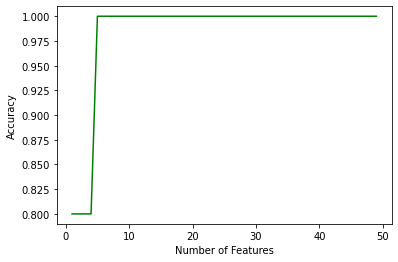

In [181]:
plt = sns.lineplot(x=range(1,50), y = SVC_scores,color='green')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
features_indexes = mrmr_indexes[:SVC_feature]
test, pred = Evaluate_Classififer_Values_FS(SVC(), Get_Features(X, features_indexes), y)
print("Best Features for SVC Classifier")
print("\n")

Best Features for MLP Classifier




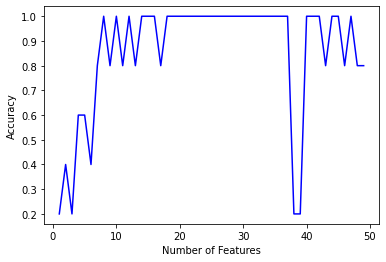

In [182]:
plt = sns.lineplot(x=range(1,50), y = MLP_scores,color = 'blue')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
features_indexes = mrmr_indexes[:MLP_feature]
test, pred = Evaluate_Classififer_Values_FS(MLPClassifier(), Get_Features(X, features_indexes), y)
print("Best Features for MLP Classifier")
print('\n')

Best Feature for Kmeans Classifier




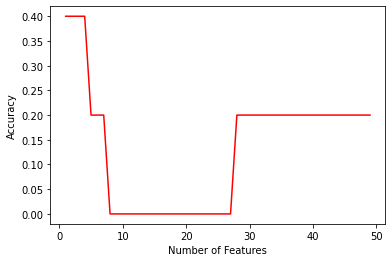

In [183]:
plt = sns.lineplot(x=range(1,50), y = Kmeans_scores,color = 'red')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
features_indexes = mrmr_indexes[:Kmeans_feature]
test, pred = Evaluate_kmeans_values_FS(Get_Features(X, features_indexes), y)
print("Best Feature for Kmeans Classifier")
print("\n")

Best Features for FCMeans Classifier




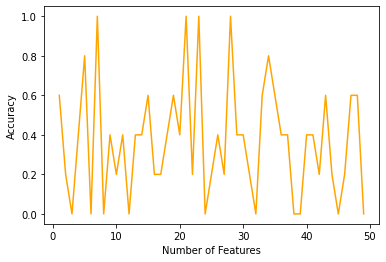

In [184]:
plt = sns.lineplot(x=range(1,50), y = FCMeans_scores,color = 'orange')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
features_indexes = mrmr_indexes[:FCMeans_feature]
test, pred = Evaluate_FCMeans_values_FS(Get_Features(X, features_indexes), y)
print("Best Features for FCMeans Classifier")
print('\n')

##ReliefF Method

In [197]:
from ReliefF import ReliefF
# fs = ReliefF(n_neighbors = 5)
# X_train = fs.fit_transform(df.to_numpy(), y)

MLP_scores = list()
SVC_scores = list()
Kmeans_scores = list()
FCMeans_scores = list()

MLP_max = 0
MLP_feature = 0
SVC_max = 0
SVC_feature = 0
Kmeans_max = 0
Kmeans_feature = 0
FCMeans_max = 0
FCMeans_feature = 0

# Looping through number of features
for n_feature in range(1, X.shape[1]):
  fs = ReliefF(n_neighbors = 5, n_features_to_keep = n_feature)
  features = fs.fit_transform(df.to_numpy(), y)

  
  # SVC
  svc_acc = Evaluate_Classififer_FS(SVC(), features, y)
  SVC_feature = n_feature if svc_acc > SVC_max else SVC_feature
  SVC_max = svc_acc if svc_acc > SVC_max else SVC_max
  SVC_scores.append(svc_acc)

  # MLP
  mlp_acc = Evaluate_Classififer_FS(MLPClassifier(), features, y)
  MLP_feature = n_feature if mlp_acc > MLP_max else MLP_feature
  MLP_max = mlp_acc if mlp_acc > MLP_max else MLP_max
  MLP_scores.append(mlp_acc)


  # K Means
  kmeans_acc = Evaluate_kmeans_FS(features, y)
  Kmeans_feature = n_feature if kmeans_acc > Kmeans_max else Kmeans_feature
  Kmeans_max = kmeans_acc if kmeans_acc > Kmeans_max else Kmeans_max
  Kmeans_scores.append(kmeans_acc)

  # FCMeans
  FCmeans_acc = Evaluate_fCMeans_FS_R(features, y)
  FCMeans_feature = n_feature if FCmeans_acc > FCMeans_max else FCMeans_feature
  FCMeans_max = FCmeans_acc if FCmeans_acc > FCMeans_max else FCMeans_max
  FCMeans_scores.append(FCmeans_acc)

Best Features for SVM Classifier




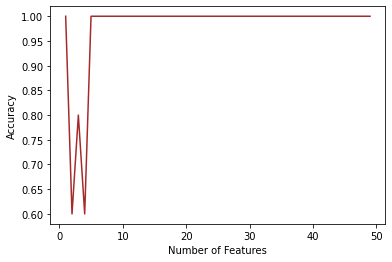

In [186]:
plt = sns.lineplot(x=range(1,50), y = SVC_scores, color = 'brown')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
fs = ReliefF(n_neighbors = 5, n_features_to_keep = SVC_feature)
features = fs.fit_transform(df.to_numpy(), y)
test, pred = Evaluate_Classififer_Values_FS(SVC(), features, y)
print("Best Features for SVM Classifier")
print('\n')

Best Features for MLP Classifier




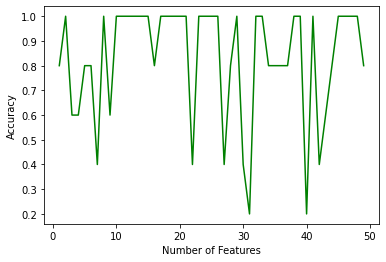

In [187]:
plt = sns.lineplot(x=range(1,50), y = MLP_scores, color ='green')
plt.set_xlabel("Number of Features")
plt.set_ylabel("Accuracy")
fs = ReliefF(n_neighbors = 5, n_features_to_keep = MLP_feature)
features = fs.fit_transform(df.to_numpy(), y)
test, pred = Evaluate_Classififer_Values_FS(MLPClassifier(), features, y)
print("Best Features for MLP Classifier")
print('\n')

Best case for Kmeans Classifier




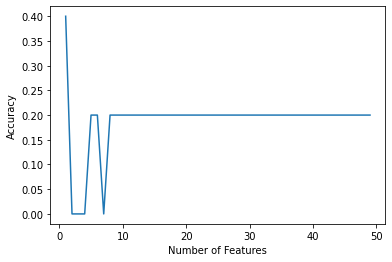

In [188]:
p = sns.lineplot(x=range(1,50), y = Kmeans_scores)
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")
fs = ReliefF(n_neighbors = 5, n_features_to_keep = Kmeans_feature)
features = fs.fit_transform(df.to_numpy(), y)
test, pred = Evaluate_kmeans_values_FS(features, y)
print("Best case for Kmeans Classifier")
print('\n')

Best Feature for FCMeans




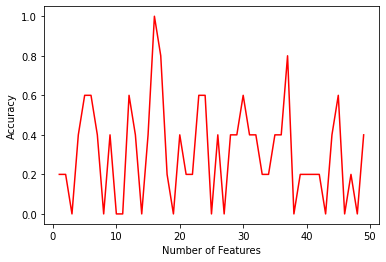

In [190]:
p = sns.lineplot(x=range(1,50), y = FCMeans_scores,color = 'red')
p.set_xlabel("Number of Features")
p.set_ylabel("Accuracy")

fs = ReliefF(n_neighbors = 5, n_features_to_keep = FCMeans_feature)
features = fs.fit_transform(df.to_numpy(), y)
test, pred = Evaluate_FCMeans_values_FS(pd.DataFrame(features), y)
print("Best Feature for FCMeans")
print('\n')

KMeans and F-CMeans using ReliefF Method

In [198]:
Kmeans_feature

1

In [201]:
FCMeans_feature

33

After Calculation, I got K-Means only 1 features and in FCMeans I got 33 features

In [202]:
Kmeans_dfr  = DataCombine.reindex(columns= ['Feature 1','Class'])
Kmeans_dfr.head()

,Feature 1,Class
0,-10.06,0
1,-9.69,0
2,-12.07,0
3,-14.21,0
4,-16.57,0


In [203]:
#Creating the variable x and y
xr1 = Kmeans_dfr.drop('Class', axis=1)
yr1 = Kmeans_dfr['Class']

In [207]:
Clustering_Evaluate_Model(Classifier_KMeans, "KMeans",xr1,yr1)

Accurancy for KMeans :  0.72


Sensitivity for class 1:  0.6
Sensitivity for class 2:  1.0
Sensitivity for class 3:  1.0
Sensitivity for class 4:  0.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  0.65


Confusion Matrix
[[3 0 0 0 2]
 [0 5 0 0 0]
 [0 0 5 0 0]
 [0 0 0 0 5]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         5
           4       0.42      1.00      0.59         5

    accuracy                           0.72        25
   macro avg       0.68      0.72      0.67        25
weighted avg       0.68      0.72      0.67        25



FCM

In [208]:
FCmeans_dfr  = DataCombine.reindex(columns= ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5',
                                             'Feature 6','Feature 7','Feature 8','Feature 9','Feature 10',
                                             'Feature 11','Feature 12','Feature 13','Feature 14','Feature 15',
                                             'Feature 16','Feature 17','Feature 18','Feature 19','Feature 20',
                                             'Feature 21','Feature 22','Feature 23','Feature 24','Feature 25',
                                             'Feature 26','Feature 27','Feature 28','Feature 29','Feature 30',
                                             'Feature 31','Feature 32','Feature 33','Class'])
FCmeans_dfr.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,...,-27.32,-32.39,-35.28,-40.72,-40.63,-49.87,-11.98,-10.99,-19.12,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,...,-30.45,-36.22,-36.85,-45.11,-45.40,-55.16,-12.15,-11.33,-22.33,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,...,-33.91,-39.95,-40.96,-49.43,-49.91,-60.11,-12.58,-11.74,-26.67,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,...,-36.56,-43.00,-43.81,-52.73,-53.89,-64.35,-13.79,-12.82,-30.56,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,...,-39.62,-45.68,-47.16,-55.65,-57.20,-67.68,-15.73,-13.87,-34.54,0


In [210]:
#Creating the variable x and y
xr1 = FCmeans_dfr.drop('Class', axis=1)
yr1 = FCmeans_dfr['Class']

In [222]:
ClusteringFCMeans_Evaluate_Model(Classifier_FCM, "FCM",xr1,yr1)

Accurancy for FCM :  0.8


Sensitivity for class 1:  1.0
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.0
Sensitivity for class 4:  1.0
Sensitivity for class 5:  1.0



Specificity for class 1:  1.0
Specificity for class 2:  1.0
Specificity for class 3:  1.0
Specificity for class 4:  1.0
Specificity for class 5:  0.75



Confusion Matrix
[[5 0 0 0 0]
 [0 5 0 0 0]
 [0 0 0 0 5]
 [0 0 0 5 0]
 [0 0 0 0 5]]


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         5
           3       1.00      1.00      1.00         5
           4       0.50      1.00      0.67         5

    accuracy                           0.80        25
   macro avg       0.70      0.80      0.73        25
weighted avg       0.70      0.80      0.73        25



###HMM

In [355]:
#Load all the data files
Data3_HMM = pd.read_csv("QCM3_Padalkar_Rashmi.csv") 
Data6_HMM = pd.read_csv("QCM6_Padalkar_Rashmi.csv") 
Data7_HMM = pd.read_csv("QCM7_Padalkar_Rashmi.csv")
Data10_HMM = pd.read_csv("QCM10_Padalkar_Rashmi.csv")
Data12_HMM = pd.read_csv("QCM12_Padalkar_Rashmi.csv")

In [225]:
Data3_HMM.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0


In [226]:
# Columns for normalization
from sklearn.preprocessing import Normalizer

normalizeFeatures = ['0.799_0.201', '0.799_0.201.1', '0.700_0.300', '0.700_0.300.1',
       '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1',
       '0.400_0.600', '0.400_0.600.1']

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

ct = ColumnTransformer([("norm", Normalizer(norm='l1'), normalizeFeatures)])

pipe = Pipeline([('normalization', ct), ('pca', PCA())])

In [229]:
X_3=pipe.fit_transform(Data3_HMM)
X_6=pipe.fit_transform(Data6_HMM)
X_7=pipe.fit_transform(Data7_HMM)
X_10=pipe.fit_transform(Data10_HMM)
X_12=pipe.fit_transform(Data12_HMM)

In [232]:
y_3= Data3_HMM.Class
y_6= Data6_HMM.Class
y_7= Data7_HMM.Class
y_10= Data10_HMM.Class
y_12= Data12_HMM.Class
#y_12.value_counts()

In [233]:
# Label Encoding the output variable
from sklearn.preprocessing import LabelEncoder

y_3 = LabelEncoder().fit_transform(y_3)
y_6= LabelEncoder().fit_transform(y_6)
y_7= LabelEncoder().fit_transform(y_7)
y_10= LabelEncoder().fit_transform(y_10)
y_12 = LabelEncoder().fit_transform(y_12)
#y_12.shape

In [240]:
x_train_3, x_test_3,y_train_3,y_test_3  = train_test_split(X_3,y_3, test_size=0.2)
x_train_6, x_test_6,y_train_6,y_test_6 = train_test_split(X_6,y_6, test_size=0.2)
x_train_7, x_test_7,y_train_7,y_test_7 = train_test_split(X_7,y_7, test_size=0.2)
x_train_10, x_test_10,y_train_10,y_test_10 = train_test_split(X_10,y_10, test_size=0.2)
x_train_12, x_test_12,y_train_12,y_test_12 = train_test_split(X_12, y_12, test_size=0.2)

QCM3

In [266]:
Evaluate_Model_HMM(clf_HMM, "HMM",x_train_3, x_test_3,y_train_3,y_test_3)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 30 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though th

ClassIndex 0
ClassIndex 1
ClassIndex 2


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' at

ClassIndex 3
ClassIndex 4
Accuracy for  HMM :  0.4


QCM 6

In [265]:
Evaluate_Model_HMM(clf_HMM, "HMM",x_train_6, x_test_6,y_train_6,y_test_6)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 30 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though th

ClassIndex 0
ClassIndex 1


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' at

ClassIndex 2
ClassIndex 3
ClassIndex 4
Accuracy for  HMM :  0.4


QCM 7

In [268]:
Evaluate_Model_HMM(clf_HMM, "HMM",x_train_7, x_test_7,y_train_7,y_test_7)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 30 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'


ClassIndex 0
ClassIndex 1


Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a mod

ClassIndex 2
ClassIndex 3
ClassIndex 4
Accuracy for  HMM :  0.4


QCM 10

In [294]:
Evaluate_Model_HMM(clf_HMM, "HMM",x_train_10, x_test_10,y_train_10,y_test_10)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though th

ClassIndex 0
ClassIndex 1
ClassIndex 2
ClassIndex 3
ClassIndex 4
Accuracy for  HMM :  0.4


QCM 12

In [262]:
Evaluate_Model_HMM(clf_HMM, "HMM",x_train_12, x_test_12,y_train_12,y_test_12)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 43 free scalar parameters with only 40 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though th

ClassIndex 0
ClassIndex 1
ClassIndex 2
ClassIndex 3
ClassIndex 4
Accuracy for  HMM :  0.4


Data Combine on HMM

In [356]:
#Droping the Class
Data3_HMM = Data3_HMM.drop('Class', axis=1)
Data6_HMM = Data6_HMM.drop('Class', axis=1)
Data7_HMM = Data7_HMM.drop('Class', axis=1)
Data10_HMM = Data10_HMM.drop('Class', axis=1)

In [357]:
#Renaming the Columns
Data3_HMM = Data3_HMM.rename(columns={"0.799_0.201": "Feature 1", "0.799_0.201.1": "Feature 2", "0.700_0.300" : "Feature 3",
                            "0.700_0.300.1" : "Feature 4", "0.600_0.400" : "Feature 5",
                            '0.600_0.400.1':"Feature 6", '0.501_0.499': "Feature 7", '0.501_0.499.1': "Feature 8",'0.400_0.600' : "Feature 9", '0.400_0.600.1' : "Feature 10"})
Data6_HMM = Data6_HMM.rename(columns={"0.799_0.201": "Feature 11", "0.799_0.201.1": "Feature 12", "0.700_0.300" : "Feature 13",
                            "0.700_0.300.1" : "Feature 14", "0.600_0.400" : "Feature 15",
                            '0.600_0.400.1':"Feature 16", '0.501_0.499': "Feature 17", '0.501_0.499.1': "Feature 18",'0.400_0.600' : "Feature 19", '0.400_0.600.1' : "Feature 20"})
Data7_HMM = Data7_HMM.rename(columns={"0.799_0.201": "Feature 21", "0.799_0.201.1": "Feature 22", "0.700_0.300" : "Feature 23",
                            "0.700_0.300.1" : "Feature 24", "0.600_0.400" : "Feature 25",
                            '0.600_0.400.1':"Feature 26", '0.501_0.499': "Feature 27", '0.501_0.499.1': "Feature 28",'0.400_0.600' : "Feature 29", '0.400_0.600.1' : "Feature 30"})
Data10_HMM = Data10_HMM.rename(columns={"0.799_0.201": "Feature 31", "0.799_0.201.1": "Feature 32", "0.700_0.300" : "Feature 33",
                            "0.700_0.300.1" : "Feature 34", "0.600_0.400" : "Feature 35",
                            '0.600_0.400.1':"Feature 36", '0.501_0.499': "Feature 37", '0.501_0.499.1': "Feature 38",'0.400_0.600' : "Feature 39", '0.400_0.600.1' : "Feature 40"})
Data12_HMM = Data12_HMM.rename(columns={"0.799_0.201": "Feature 41", "0.799_0.201.1": "Feature 42", "0.700_0.300" : "Feature 43",
                            "0.700_0.300.1" : "Feature 44", "0.600_0.400" : "Feature 45",
                            '0.600_0.400.1':"Feature 46", '0.501_0.499': "Feature 47", '0.501_0.499.1': "Feature 48",'0.400_0.600' : "Feature 49", '0.400_0.600.1' : "Feature 50"})

In [358]:
#Contacting the data
DataCombine_HMM = pd.concat([Data3_HMM, Data6_HMM, Data7_HMM, Data10_HMM, Data12_HMM], axis=1)

In [359]:
DataCombine_HMM.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10',
       'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15',
       'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20',
       'Feature 21', 'Feature 22', 'Feature 23', 'Feature 24', 'Feature 25',
       'Feature 26', 'Feature 27', 'Feature 28', 'Feature 29', 'Feature 30',
       'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 35',
       'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39', 'Feature 40',
       'Feature 41', 'Feature 42', 'Feature 43', 'Feature 44', 'Feature 45',
       'Feature 46', 'Feature 47', 'Feature 48', 'Feature 49', 'Feature 50',
       'Class'],
      dtype='object')

In [370]:
# Columns for normalization
from sklearn.preprocessing import Normalizer

normalizeFeatures1 = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10',
       'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15',
       'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20',
       'Feature 21', 'Feature 22', 'Feature 23', 'Feature 24', 'Feature 25',
       'Feature 26', 'Feature 27', 'Feature 28', 'Feature 29', 'Feature 30',
       'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 35',
       'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39', 'Feature 40',
       'Feature 41', 'Feature 42', 'Feature 43', 'Feature 44', 'Feature 45',
       'Feature 46', 'Feature 47', 'Feature 48', 'Feature 49', 'Feature 50']

In [371]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

ct = ColumnTransformer([("norm", Normalizer(norm='l1'), normalizeFeatures1)])

pipe = Pipeline([('normalization', ct), ('pca', PCA())])

In [372]:
Xhmm = pipe.fit_transform(DataCombine_HMM)

In [381]:
Yhmm= DataCombine_HMM.Class

In [382]:
Yhmm = LabelEncoder().fit_transform(Yhmm)

In [383]:
x_train_hmm, x_test_hmm,y_train_hmm,y_test_hmm = train_test_split(Xhmm, Yhmm, test_size=0.2)

In [393]:
#Evaluate_Model_HMM(clf_HMM, "HMM",x_train_hmm, x_test_hmm,y_train_hmm,y_test_hmm)